# Analysis-of-2024-French-Legislatives-Elections

Import Modules

In [24]:
import pandas as pd
import os
import sqlite3
import google.generativeai as genai
import csv
import dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_community.utilities import SQLDatabase
from langchain_experimental.sql import SQLDatabaseChain
from langchain.agents import initialize_agent, tools
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain.agents import ZeroShotAgent, AgentExecutor
from langchain.chains import LLMChain

# Gathering Data

In [10]:
csv_file = 'resultats-definitifs-par-regions.csv'
df = pd.read_csv(csv_file, sep=';', decimal=',')

# create a SQLite database and connect to it
db_file = 'elections.db'
conn = sqlite3.connect(db_file)

# write the DataFrame to a SQLite table
df.to_sql('elections', conn, if_exists='replace', index=False)
conn.close()
print(f"Data from {csv_file} has been written to {db_file} in the 'elections' table.")

Data from resultats-definitifs-par-regions.csv has been written to elections.db in the 'elections' table.


# Using the LLM to Write and Run SQL

In [15]:
import os
import dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_experimental.sql import SQLDatabaseChain
from langchain_community.utilities import SQLDatabase
from langchain.agents import initialize_agent, Tool # Import Tool


dotenv.load_dotenv(override=True)

# Database setup
db = SQLDatabase.from_uri("sqlite:///elections.db")


llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-preview-04-17",
    temperature=0,
    google_api_key=os.getenv("GOOGLE_API_KEY")
)


db_chain = SQLDatabaseChain(
    llm=llm,
    database=db,
    verbose=True,
    return_direct=True 
)
tools = [
    Tool(
        name="Elections Database",
        func=db_chain.run, 
        description="Useful for answering questions about elections data. Input should be a question."
    )
]




agent = initialize_agent(
    tools, 
    llm,
    agent="zero-shot-react-description",
    max_iterations=1,
    early_stopping_method="generate",
    verbose=True
)

try:
    response = agent.run("How many voters are in France?")
    print(response)
except Exception as e:
    print(f"Agent execution failed: {e}")


/home/codespace/.python/current/lib/python3.12/site-packages/langchain_experimental/sql/base.py:77: UserWarning: Directly instantiating an SQLDatabaseChain with an llm is deprecated. Please instantiate with llm_chain argument or using the from_llm class method.
  warnings.warn(




> Entering new AgentExecutor chain...
The user is asking for the number of voters in France. I have access to an Elections Database tool which seems relevant for this type of question. I should use this tool to query the database about the number of voters in France.Action: Elections Database
Action Input: How many voters are in France?

> Entering new SQLDatabaseChain chain...
How many voters are in France?
SQLQuery:The user is asking for the number of voters in France. I have access to an Elections Database tool which seems relevant for this type of question. I should use this tool to query the database about the number of voters in France.Action: Elections Database
Action Input: How many voters are in France?

> Entering new SQLDatabaseChain chain...
How many voters are in France?
SQLQuery:SQLQuery: SELECT SUM("Votants") FROM elections
SQLResult: [(32093013,)]
> Finished chain.

Observation: [(32093013,)]
Thought:SQLQuery: SELECT SUM("Votants") FROM elections
SQLResult: [(32093013

In [16]:
db_chain("Est-ce que tu peux trouver le nombre de votants au Rassemblement National?")

/tmp/ipykernel_8093/671110524.py:1: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  db_chain("Est-ce que tu peux trouver le nombre de votants au Rassemblement National?")




> Entering new SQLDatabaseChain chain...
Est-ce que tu peux trouver le nombre de votants au Rassemblement National?
SQLQuery:Question: Est-ce que tu peux trouver le nombre de votants au Rassemblement National?
SQLQuery: SELECT SUM(CASE WHEN "Nuance candidat 1" = 'RN' THEN "Voix 1" ELSE 0 END) + SUM(CASE WHEN "Nuance candidat 2" = 'RN' THEN "Voix 2" ELSE 0 END) + SUM(CASE WHEN "Nuance candidat 3" = 'RN' THEN "Voix 3" ELSE 0 END) + SUM(CASE WHEN "Nuance candidat 4" = 'RN' THEN "Voix 4" ELSE 0 END) + SUM(CASE WHEN "Nuance candidat 5" = 'RN' THEN "Voix 5" ELSE 0 END) + SUM(CASE WHEN "Nuance candidat 6" = 'RN' THEN "Voix 6" ELSE 0 END) + SUM(CASE WHEN "Nuance candidat 7" = 'RN' THEN "Voix 7" ELSE 0 END) + SUM(CASE WHEN "Nuance candidat 8" = 'RN' THEN "Voix 8" ELSE 0 END) + SUM(CASE WHEN "Nuance candidat 9" = 'RN' THEN "Voix 9" ELSE 0 END) + SUM(CASE WHEN "Nuance candidat 10" = 'RN' THEN "Voix 10" ELSE 0 END) + SUM(CASE WHEN "Nuance candidat 11" = 'RN' THEN "Voix 11" ELSE 0 END) + SUM(CASE

{'query': 'Est-ce que tu peux trouver le nombre de votants au Rassemblement National?',
 'result': '[(9316716.0,)]'}

In [30]:
db_chain("parisin olduğu bölgede milliyetçi hareket partisi kaç oy almış toplam")



> Entering new SQLDatabaseChain chain...
parisin olduğu bölgede milliyetçi hareket partisi kaç oy almış toplam
SQLQuery:

Question: parisin olduğu bölgede milliyetçi hareket partisi kaç oy almış toplam
SQLQuery: SELECT SUM(CASE WHEN "Nuance candidat 1" = 'RN' THEN "Voix 1" ELSE 0 END + CASE WHEN "Nuance candidat 2" = 'RN' THEN "Voix 2" ELSE 0 END + CASE WHEN "Nuance candidat 3" = 'RN' THEN "Voix 3" ELSE 0 END + CASE WHEN "Nuance candidat 4" = 'RN' THEN "Voix 4" ELSE 0 END + CASE WHEN "Nuance candidat 5" = 'RN' THEN "Voix 5" ELSE 0 END + CASE WHEN "Nuance candidat 6" = 'RN' THEN "Voix 6" ELSE 0 END + CASE WHEN "Nuance candidat 7" = 'RN' THEN "Voix 7" ELSE 0 END + CASE WHEN "Nuance candidat 8" = 'RN' THEN "Voix 8" ELSE 0 END + CASE WHEN "Nuance candidat 9" = 'RN' THEN "Voix 9" ELSE 0 END + CASE WHEN "Nuance candidat 10" = 'RN' THEN "Voix 10" ELSE 0 END + CASE WHEN "Nuance candidat 11" = 'RN' THEN "Voix 11" ELSE 0 END + CASE WHEN "Nuance candidat 12" = 'RN' THEN "Voix 12" ELSE 0 END + CASE WHEN "Nuance candidat 13" = 'RN' THEN "Voix 13" ELSE 0 END + CASE WHEN "Nuance candidat 14" = 'RN' THEN "Voix 14" ELSE 0

{'query': 'parisin olduğu bölgede milliyetçi hareket partisi kaç oy almış toplam',
 'result': '[(818552.0,)]'}

# Using the LLM to Visualize the Data

In [ ]:
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL
python_repl = PythonREPL()
description = (
    "Useful for when you need to answer questions about voters. "
    "You must not input SQL. Use this more than the Python tool if the question "
    "is about voter data, like 'how many RN voters are there?' or 'count the number of precincts'"
)

voter_data = Tool(
    name="Data",  
    func=db_chain.run,
    description=description,
)

tools.append(voter_data)


In [26]:
# Ensure tools is correctly defined as a list
agent_tools = [
    Tool(
        name="Elections Database",
        func=db_chain.run, 
        description="Useful for answering questions about elections data. Input should be a question."
    ),
    Tool(
        name="Data", 
        func=db_chain.run,
        description="Useful for when you need to answer questions about voters. You must not input SQL. Use this more than the Python tool if the question is about voter data, like 'how many RN voters are there?' or 'count the number of precincts'"
    ),
    Tool(
        name="Python_REPL",
        func=python_repl.run,
        description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`."
    )
]

prefix = "Fulfill the following request as best you can. You have access to the following tools:"


suffix = (
    "Begin! When looking for data, do not write a SQL query. "
    "Pass the relevant portion of the request directly to the Data tool in its entirety."
    "\n\n"
    "Request: {input}\n"
    "{agent_scratchpad}"
)


prompt = ZeroShotAgent.create_prompt(
    agent_tools, prefix=prefix, suffix=suffix, input_variables=["input", "agent_scratchpad"]
)


llm_chain = LLMChain(llm=llm, prompt=prompt)


tool_names = [tool.name for tool in agent_tools]
agent = ZeroShotAgent(llm_chain=llm_chain, allowed_tools=tool_names)


agent_executor = AgentExecutor.from_agent_and_tools(
    agent=agent, tools=agent_tools, verbose=True
)



/tmp/ipykernel_8093/3450531536.py:37: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(llm=llm, prompt=prompt)
/tmp/ipykernel_8093/3450531536.py:41: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = ZeroShotAgent(llm_chain=llm_chain, allowed_tools=tool

In [27]:
print(prompt.template)

Fulfill the following request as best you can. You have access to the following tools:

Elections Database(*args: Any, callbacks: Union[list[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None, tags: Optional[list[str]] = None, metadata: Optional[dict[str, Any]] = None, **kwargs: Any) -> Any - Useful for answering questions about elections data. Input should be a question.
Data(*args: Any, callbacks: Union[list[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None, tags: Optional[list[str]] = None, metadata: Optional[dict[str, Any]] = None, **kwargs: Any) -> Any - Useful for when you need to answer questions about voters. You must not input SQL. Use this more than the Python tool if the question is about voter data, like 'how many RN voters are there?' or 'count the number of precincts'
Python_REPL(command: str, timeout: Optional[int] = None) -> str - A 



> Entering new AgentExecutor chain...
Question: Show a bar graph visualizing the answer to the following question: Est-ce que tu peux trouver le nombre de votants au Rassemblement National?
Thought: The user wants to know the number of voters for the "Rassemblement National" and visualize it as a bar graph.
I should use the `Data` tool to get the number of voters for the specified party, as it is designed for voter data questions and explicitly mentions examples like 'how many RN voters are there?'.
After getting the data, I will use the `Python_REPL` to create a bar graph.
Action: Data
Action Input: number of voters for Rassemblement National

> Entering new SQLDatabaseChain chain...
number of voters for Rassemblement National
SQLQuery:SQLQuery: SELECT SUM(CASE WHEN "Nuance candidat 1" = 'RN' THEN "Voix 1" ELSE 0 END + CASE WHEN "Nuance candidat 2" = 'RN' THEN "Voix 2" ELSE 0 END + CASE WHEN "Nuance candidat 3" = 'RN' THEN "Voix 3" ELSE 0 END + CASE WHEN "Nuance candidat 4" = 'RN' T

Python REPL can execute arbitrary code. Use with caution.


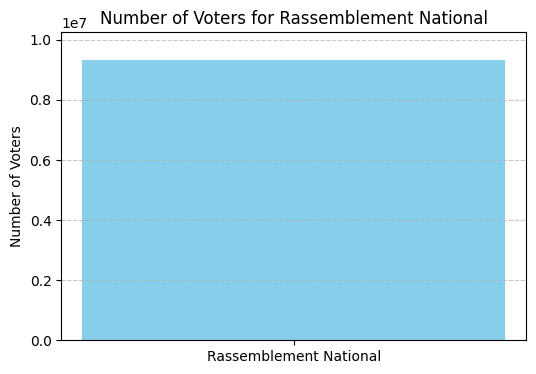

I have the number of voters for Rassemblement National, which is 9316716.0. I need to create a bar graph to visualize this. I will use the Python REPL with matplotlib.
Action: Python_REPL
Action Input:
import matplotlib.pyplot as plt

party = 'Rassemblement National'
voter_count = 9316716.0

plt.figure(figsize=(6, 4))
plt.bar([party], [voter_count], color='skyblue')
plt.ylabel('Number of Voters')
plt.title('Number of Voters for Rassemblement National')
plt.ylim(0, voter_count * 1.1) # Set y-axis limit slightly above the value
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
Observation: 
Thought:I have shown the bar graph visualizing the number of voters for Rassemblement National.

Final Answer: I have shown the bar graph visualizing the number of voters for Rassemblement National.

> Finished chain.


'I have shown the bar graph visualizing the number of voters for Rassemblement National.'

In [32]:

request = "Show a bar graph visualizing the answer to the following question: Est-ce que tu peux trouver le nombre de votants au Rassemblement National?"

agent_executor.run(request)




> Entering new AgentExecutor chain...
Question: show a Plot Plot a pie chart graf to ansver question The cities that voted for the Rassemblelement National party
Thought: The user wants a pie chart showing data about cities that voted for the Rassemblement National party. I need to get the data first. The instructions say to use the `Data` tool for voter data and to pass the relevant portion of the request directly. The request is about cities voting for a specific party, which is related to election results by location. The `Data` tool description includes examples related to RN voters. I will use the `Data` tool to retrieve the data about cities and their votes for Rassemblement National.
Action: Data
Action Input: The cities that voted for the Rassemblement National party

> Entering new SQLDatabaseChain chain...
The cities that voted for the Rassemblement National party
SQLQuery:SQLQuery: SELECT "Libellé région" FROM elections WHERE ("Nuance candidat 1" = 'RN' AND "Voix 1" > 0) O

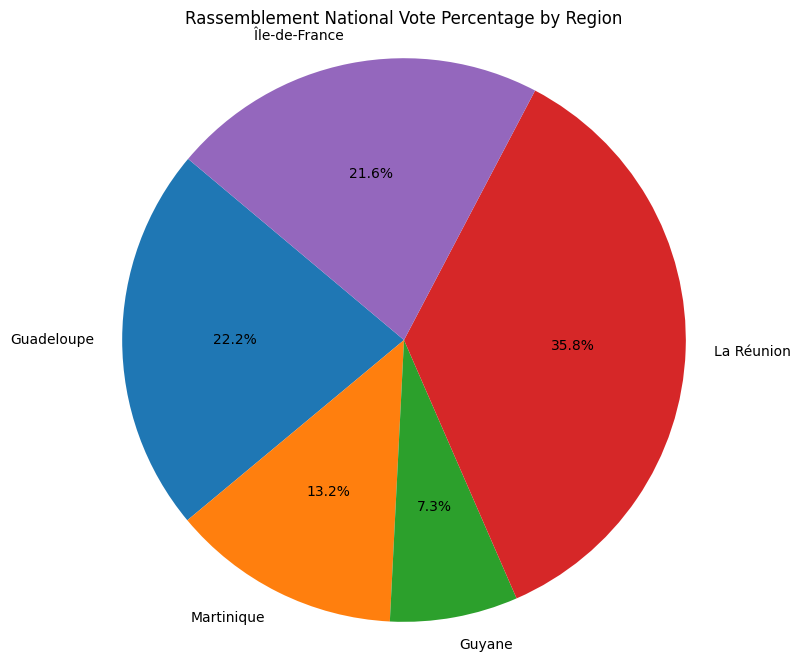

Thought: The user wants a pie chart based on the data I retrieved: `[('Guadeloupe', '16,84%'), ('Martinique', '10,00%'), ('Guyane', '5,58%'), ('La Réunion', '27,18%'), ('Île-de-France', '16,41%')]`.
I need to process this data to extract the labels (regions) and the numerical values (percentages). The percentages are strings with a comma and a percentage sign, so I need to convert them to floats.
Then, I will use the `Python_REPL` to generate the pie chart using `matplotlib`.

Steps:
1.  Define the data list in Python.
2.  Process the data to get labels and values.
3.  Import `matplotlib.pyplot`.
4.  Create the pie chart.
5.  Add title and labels.
6.  Display the plot.
Action: Python_REPL
Action Input: import matplotlib.pyplot as plt

data = [('Guadeloupe', '16,84%'), ('Martinique', '10,00%'), ('Guyane', '5,58%'), ('La Réunion', '27,18%'), ('Île-de-France', '16,41%')]

labels = [item[0] for item in data]
values = [float(item[1].replace('%', '').replace(',', '.')) for item in data]

plt

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting

In [37]:
request = "show a Plot  Plot a pie chart graf to ansver question The cities that voted for the Rassemblement National party"
agent_executor.run(request)